In [2]:

import FullSkyCalculation as FSC
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad, dblquad
from scipy.interpolate import interp1d
import scipy.fft
import cmath
import mpmath as mm

Using CAMB 1.0.4 installed at /Users/cheng/anaconda3/lib/python3.7/site-packages/camb-1.0.4-py3.7.egg/camb


0.0001
396.8


/Users/cheng/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
FSC.s8

0.8374759699653609

In [8]:
import OurApproximation as OA
Power_spectrum = OA.Power_spectrum
kh_par_min_max = OA.kh_par_min_max

### **Test power spectrum as a function of $k_{//}$:**

In [162]:
l=500
chi = FSC.chi(1.0)
kh_min, kh_max = kh_par_min_max(l,chi)
print(chi)

2288.9234085972853


In [163]:
N = 1000
kh_par_array = np.array(list(-10**np.array([np.log10(1e-8)+np.log10(kh_max/1e-8)*2/N*i for i in range(int(N/2))]))[::-1]+\
    list(10**np.array([np.log10(1e-8)+np.log10(kh_max/1e-8)*2/N*i for i in range(int(N/2))])))

kh_par = np.fft.fftshift(kh_par_array)


Text(0.5, 1.0, '$\\ell$=10,z=1.0,$\\delta\\chi=0$')

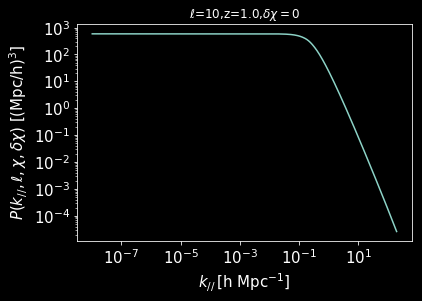

In [164]:
#Here we plot the power spectrum as a function of k_par, where we temporarily fix the l, \chi and \delta\chi
plt.style.use('dark_background')
power_array = np.array([Power_spectrum(kh, l, chi, 0) for kh in kh_par_array])
plt.loglog(kh_par_array[501:], power_array[501:])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(r'$k_{//}\rm\, [h\ Mpc^{-1}]$',fontsize=15)
plt.ylabel(r'$P(k_{//},\ell, \chi, \delta\chi)\rm\ [(Mpc/h)^{3}]$',fontsize=15)
plt.title(r'$\ell$=10,z=1.0,$\delta\chi=0$')

### **Test of Fourier Transformation:**

In [103]:
def C_fft(l, chi, delta_chi):
    '''
    Here we use the FFT algorithm to calculate the Equation(34), which formally a 1D Fourier transformation
    N here is the number of discrete points that we need.
    '''
    #Creat power spectrum array in respect of k_par
    kh_par_min, kh_par_max = 0,20 #kh_par_min_max(l, chi)
    if delta_chi>=40:
        dkh_crit = 2*np.pi/delta_chi/10
        N_crit = int(kh_par_max/dkh_crit)
        if N_crit>10000:
            dkh = 2*np.pi/delta_chi/2.5
            N = int(kh_par_max/dkh)
        else:
            dkh = dkh_crit
            N = N_crit
    else:
        dkh = kh_par_max/5000
        N = 5000
    #print('Number of Samples:', N)
    #N = int((k_par_max-k_par_min)/dk)
    #k_par_array =np.array(list(-10**np.array([np.log10(k_par_min+1e-8) + (np.log10(k_par_max/1e-8)*2/N)*i for i in range(int(N/2))]))[::-1]+\
                #list(10**np.array([np.log10(k_par_min+1e-8) + (np.log10(k_par_max/1e-8)*2/N)*i for i in range(int(N/2))])))
    #k_par_array = np.array([-k_par_max + k_par_max*2/N*i for i in range(int(N/2))]+[k_par_min + k_par_max*2/N*i for i in range(int(N/2))])
    kh_par_array = [-dkh*N/2 + dkh*i for i in range(N)]
 
    kh_par = scipy.fft.fftshift(kh_par_array)
    power_array = [Power_spectrum(kh, l, chi, delta_chi) for kh in kh_par]
    C_array = scipy.fft.fftshift(scipy.fft.ifft(power_array))
    w_array = scipy.fft.fftshift(scipy.fft.fftfreq(len(power_array))*2*np.pi/dkh)
    C_array *= [N*dkh*cmath.exp(1j*w*kh_par_min).real/(2*np.pi) for w in w_array]

    C_fft_func = interp1d(w_array, np.real(C_array))
    return C_fft_func(delta_chi) #w_array, C_array #C_fft_func(delta_chi) ##,k_par_array, power_array

In [ ]:
w_array, C_array = C_fft(l,chi,500)
plt.plot(w_array, C_array)
plt.xlim(-600,600)

In [16]:
#Besides the value at delta_chi=500, we consider the direct integral over the power spectrum, which should be the same value of delta_chi=0 in the above Fourier transformation
from scipy.integrate import trapezoid
integral_Pk = trapezoid(power_array, kh_par_array)/(2*np.pi)
print(integral_Pk)

237.94063538874715


In [ ]:
w_array0, C_array0 = C_fft(l,chi,0)
plt.plot(w_array0, C_array0)
plt.xlim(-600,600)

In [17]:
integral_Pk0 = trapezoid(power_array, kh_par_array)/(2*np.pi)
print(integral_Pk0)

237.94063538874715


In [19]:
C_interp = interp1d(w_array0, C_array0.real)
print(C_interp(0))
#The comparison between the expected calcuation value and 

224.6595909092653


### **Consider Integral for l=2**

In [169]:
dchi_new = np.array([40/10*i for i in range(10)]+[40+(100-40)/6*i for i in range(6)])
C_l_500 = np.array([ C_fft(l=500, chi=chi_array[10], delta_chi=dchi) for dchi in dchi_new])

In [173]:
print(delta_chi_array)
print(Cl_500[:,10])
print(dchi_new)
print(C_l_500)
print(chi_array[10])

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 200. 300. 400.
 500.]
[ 6.17345063e+01  6.56853023e+00  6.63539654e-01  2.17836856e-01
  5.28805384e-02 -7.94495559e-03 -4.52162195e-03 -4.54265138e-04
 -5.03815603e-04 -3.91003537e-04  9.67482616e-04 -3.09798406e-04
  4.75153730e-04  2.21603835e-04  5.86628491e-04]
[ 0.  4.  8. 12. 16. 20. 24. 28. 32. 36. 40. 50. 60. 70. 80. 90.]
[ 6.17345063e+01  2.73067862e+01  1.06198611e+01  4.05189757e+00
  1.55539316e+00  6.63539654e-01  3.70372018e-01  2.57781676e-01
  1.80547483e-01  1.11522281e-01  5.28805384e-02 -7.94495559e-03
 -4.52162195e-03 -4.54265138e-04 -5.03815603e-04 -3.91003537e-04]
2288.9234085972853


Text(0.5, 1.0, '$\\ell=500,\\ z(\\chi)=1.0$')

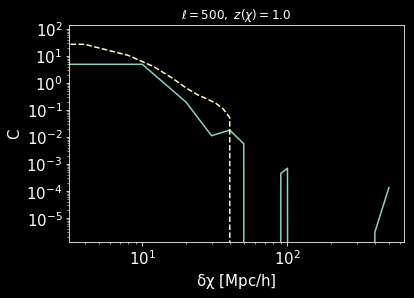

In [175]:
#Here I tried to test the convergence of C_fft function by change different numbers of DFT grids
#plt.semilogx(delta_chi_array[1:], C_l_10_chi_2280[1:],'--')
Cl_500 = np.load('./C_ell/C_l_500.npy')
plt.loglog(delta_chi_array, Cl_500[:,1])
plt.loglog(dchi_new, C_l_500,'--')
plt.xlabel(r'$\rm \delta \chi\ [Mpc/h]$',fontsize=15)
plt.ylabel(r'C',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(r'$\ell=%d,\ z(\chi)=1.0$'%l)

### **Consider two galaxy clustering power spectrum at $z_1=z_2=1.0$, $\sigma_1=\sigma_2=0.05$:**

In [7]:
#Now we test the C function calculation z1=z2=1.0, sigma1=sigma2=0.05
z1 = 1.0
z2 = 1.0
sigma1 = 0.05
sigma2 = 0.05
chi_avg1 = FSC.chi(z1)
chi_avg2 = FSC.chi(z2)
chi_sigma1 = sigma1/FSC.HH(z1)
chi_sigma2 = sigma2/FSC.HH(z2)
chi_min = chi_avg1-4*chi_sigma1
chi_max = chi_avg2+4*chi_sigma2
#So here we fix the chi in our power spectrum function, while vary the delta chi
N_chi_array = 20
chi_array = np.array([chi_min + i*(chi_max-chi_min)/N_chi_array for i in range(N_chi_array)])

N_delta_chi_array = 15
delta_chi_array = np.array([100/10*i for i in range(10)]+[100+500/5*i for i in range(5)])

l_array_short = np.array([int(2 + i) for i in range(8)] + [int(10 + 10 * i) for i in range(9)] + [int(100+50*i) for i in range(10)])
l_array_short_new = np.array([2, 5, 10, 20, 40, 80, 100 ,150, 200, 300, 500])


### **Create $C(\ell,\chi,\delta\chi)$ files on grids of $\chi$ and $\delta\chi$:**

In [135]:
#One way to improve the integral is to firstly generate files of C_l as a function of chi and delta_chi
for l in l_array_short_new:
    Cl_delta_chi = []
    for delta_chi_x in delta_chi_array:
        Cl_chi = []
        for chi_x in chi_array:
            Cl_chi.append(C_fft(l, chi_x, delta_chi_x))
        Cl_delta_chi.append(Cl_chi)
    np.save('./C_ell/C_l_%d'%l, Cl_delta_chi)
    print('Saved file for l=%d'%l)
    

Saved file for l=5
Saved file for l=20
Saved file for l=40
Saved file for l=80
Saved file for l=150
Saved file for l=200
Saved file for l=300
Saved file for l=500


### **Finish the calculation of Equation(34) based on files generated above:**

In [136]:
from scipy.interpolate import interp2d
delta_extend = list(-delta_chi_array[1:][::-1])+[0]+ list(delta_chi_array[1:])

def intergral_kernel(l, chi, delta_chi, n):
    '''
    n is the order of Cl^n, as defined in Equation(33)
    '''
    #Here we have extended our data to negative delta_chi part, which based on the symetric property of our equation
    delta_extend = list(-delta_chi_array[1:][::-1])+[0]+ list(delta_chi_array[1:])
    Cl_array = np.load('./C_ell/C_l_%d.npy'%l)
    Nx = len(Cl_array[0,:])
    Ny = len(Cl_array[:,0])
    Cl_extend = np.zeros(( Ny*2-1, Nx))
    for i in range(len(Cl_extend[0,:])):
        for j in range(len(Cl_array[:,0])):
            Cl_extend[j,i] = Cl_array[::-1][j,i]
            Cl_extend[Ny-1+j,i] = Cl_array[j,i]
    
    #Now define the whole function and perform 2D integral
    #Get C_\ell(l=2, \chi, \delta\chi) from our data to 
    Cl_chi_dchi = interp2d(chi_array, delta_extend, Cl_extend)
    
    Wg1 = Wg(chi-0.5*delta_chi, chi_avg1, chi_sigma1)
    Wg2 = Wg(chi+0.5*delta_chi, chi_avg1, chi_sigma1)
    Cl = Cl_chi_dchi(chi, delta_chi)

    return Wg1*Wg2*Cl*(delta_chi/chi)**n/chi**2

def Cl_n(n, l):

    return dblquad(lambda y, x: intergral_kernel(l, y, x, n), delta_extend[0], delta_extend[-1], chi_array[0], chi_array[-1])[0]


### **Calculate our approximation for different $\ell s$**

In [154]:
Cl_0_array = [Cl_n(0,l) for l in l_array_short_new]

In [156]:
Cl_1_array = [Cl_n(1,l) for l in l_array_short_new]

In [157]:
Cl_1_array

[-9.471338527813229e-28,
 1.845088680629561e-29,
 4.735669263906614e-28,
 -6.420965347648419e-30,
 4.613523045466865e-25,
 8.166377682391567e-29,
 -7.802688728561064e-28,
 4.251829573651597e-28,
 -2.883377375620577e-26,
 0.0,
 1.6645124563326503e-30]

### **Read the results from Assassi's Calculation:**

In [4]:

l_Assassi = []
Cl_Assassi = []

with open('./z1_z2_1 copy.txt','r') as file:
    lines = file.readlines()
    for line in lines:
        l, C = line.split(',')
        l_Assassi.append(int(l))
        Cl_Assassi.append(float(C.strip('\n')))

file.close()
        



### **Plot the comparison between all three methods:**

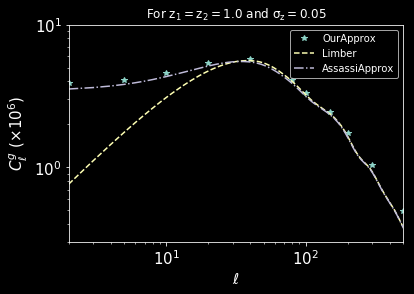

In [155]:
plt.loglog(l_array_short_new, np.array(Cl_0_array)*1e6, '*', label=r'OurApprox')
plt.loglog(l_limber_array, Cl_Limber_array*1e6, '--', label=r'Limber')
plt.loglog(l_Assassi, np.array(Cl_Assassi)*1e6,'-.', label=r'AssassiApprox')
plt.ylim(0.3,10)
plt.xlim(2,500)
plt.legend()
plt.xlabel(r'$\ell$',fontsize=15)
plt.ylabel(r'$C_{\ell}^{g}\ (\times 10^6)$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(r'For $\rm z_1=z_2=1.0\ and\ \sigma_z=0.05$')
plt.show()

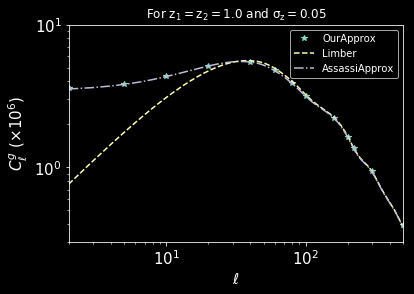

In [11]:
plt.style.use('dark_background')
plt.loglog([2,5,10,20,40,60,80,100,160,200,220,300,500], [3.5877433, 3.8702652, 4.36660231, 5.1585568478, 5.50923622,\
    4.81898365,3.908997649,3.18534314943,2.2218635416,1.62684690276,1.36766174866,0.946393595391,0.397180244], '*', label=r'OurApprox')
plt.loglog(l_limber_array, Cl_Limber_array*1e6, '--', label=r'Limber')
plt.loglog(l_Assassi, np.array(Cl_Assassi)*1e6,'-.', label=r'AssassiApprox')
plt.ylim(0.3,10)
plt.xlim(2,500)
plt.legend()
plt.xlabel(r'$\ell$',fontsize=15)
plt.ylabel(r'$C_{\ell}^{g}\ (\times 10^6)$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(r'For $\rm z_1=z_2=1.0\ and\ \sigma_z=0.05$')
plt.show()

In [ ]:
#Now it seems that properly choosing the range of delta_chi is very important
#We don't need to choose so many large delta_chi in actual calculation, rather, we need to sample more delta_chi smaller than 100 Mpc/h

### **Limber's Approximation of Galaxy Clustering:**

In [100]:
#Before we move on to calculate Equation (33), we can calculate our version of Limber's approximation 

#The unit of our 1D integral is (Mpc)^2/h^3, so to adjust the amplitude, in addition divide a factor of FSC.h
#Re-check the comoving distance
z_array = np.array([0.1+0.1*i for i in range(20)])
print(FSC.chi(1),'[Mpc]')
print(FSC.chi(1)*FSC.h,'[Mpc/h]')



3410.7039317497915 [Mpc]
2288.9234085972853 [Mpc/h]


In [9]:
def Wg(chi, chi_avg, chi_sigma):
    '''
    Here we consider a Gaussian window function
    '''
    term1 = 1/(np.sqrt(2*np.pi))/chi_sigma
    term2 = np.exp(-(chi-chi_avg)**2/(2*chi_sigma**2))
    return term1*term2
def Kernel_Limber(l, chi, chi_avg, chi_sigma):
    
    kh_min, kh_max = kh_par_min_max(l, chi)
    W1 = Wg(chi, chi_avg, chi_sigma)
    W2 = W1
    C = Power_spectrum(kh_par=0, l=l, chi=chi, delta_chi=0)
    return W1*W2*C
def Cn_Limber(l, chi_avg, chi_sigma, chi_min, chi_max):

    def integrand(chi):
        return Kernel_Limber(l,chi, chi_avg, chi_sigma)/(chi**2)
    
    return quad(integrand, chi_min, chi_max)[0]

In [10]:
l_limber_array = np.array([i for i in range(2,100)]+[100+10*i for i in range(40)])
Cl_Limber_array = np.array([Cn_Limber(l, chi_avg1, chi_sigma1, chi_min, chi_max) for l in l_limber_array])


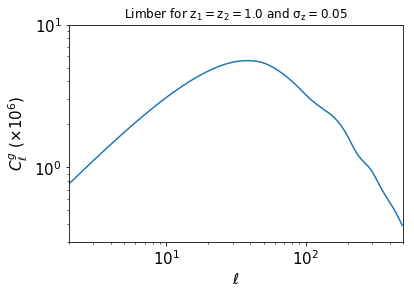

In [7]:
plt.loglog(l_limber_array, Cl_Limber_array*1e6)
plt.ylim(0.3,10)
plt.xlim(2,500)
plt.xlabel(r'$\ell$',fontsize=15)
plt.ylabel(r'$C_{\ell}^{g}\ (\times 10^6)$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(r'Limber for $\rm z_1=z_2=1.0\ and\ \sigma_z=0.05$')
plt.show()